In [1]:
import numpy as np
#import ipympl
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import stats
from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector
from mmtwfs.telescope import MMT

In [2]:
flwo_wfs = WFSFactory(wfs="flwo12")

In [3]:
%cd ~/MMT/FLWO/GOOD/

/Users/tim/MMT/FLWO/GOOD


<IPython.core.display.Javascript object>


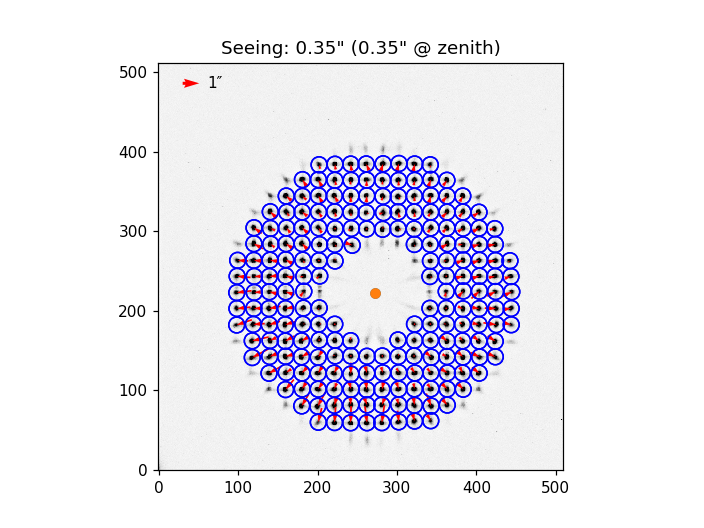

In [4]:
#flwo_wfs.cen_sigma = 3.
file = "TYC5611_1.fits"
slopes = flwo_wfs.measure_slopes(file, plot=True)
slopes['figures']['slopes'].show()

In [ ]:
plt.show()

509.6913262826493 nm
Fringe Coefficients
 Z02:         42.56 ±  51.1 nm 	 X Tilt (1, 1)
 Z03:         53.76 ±    53 nm 	 Y Tilt (1, -1)
 Z04:        -402.9 ±  25.5 nm 	 Defocus (2, 0)
 Z05:        -51.47 ±  33.5 nm 	 Primary Astig at 45° (2, -2)
 Z06:        -11.03 ±  34.1 nm 	 Primary Astig at 0° (2, 2)
 Z07:           137 ±    27 nm 	 Primary Y Coma (3, -1)
 Z08:         95.88 ±  25.9 nm 	 Primary X Coma (3, 1)
 Z09:         5.009 ±  34.8 nm 	 Y Trefoil (3, -3)
 Z10:       -0.3163 ±  34.3 nm 	 X Trefoil (3, 3)
 Z11:        -18.56 ±    23 nm 	 Primary Spherical (4, 0)
 Z12:        -35.73 ±  24.1 nm 	 Secondary Astigmatism at 0° (4, 2)
 Z13:        -39.49 ±  25.1 nm 	 Secondary Astigmatism at 45° (4, -2)
 Z14:        -67.66 ±  35.2 nm 	 X Tetrafoil (4, 4)
 Z15:        -15.42 ±  33.2 nm 	 Y Tetrafoil (4, -4)
 Z16:         31.07 ±  27.7 nm 	 Secondary X Coma (5, 1)
 Z17:          4.07 ±  28.4 nm 	 Secondary Y Coma (5, -1)
 Z18:        -5.841 ±  24.5 nm 	 Secondary X Trefoil (5, 3)
 Z19: 

<IPython.core.display.Javascript object>


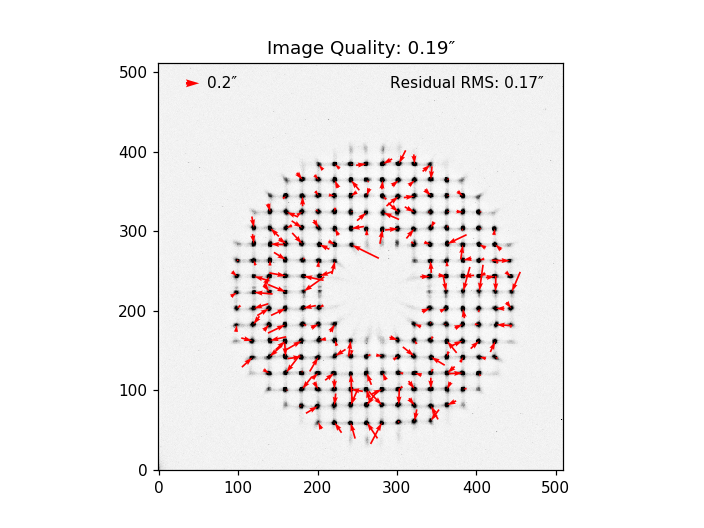

In [5]:
zresults = flwo_wfs.fit_wavefront(slopes, plot=True)
zvec = zresults['zernike']
print(zresults['residual_rms'])
print(zvec.pretty_print())
#print(zvec)
zresults['resid_plot'].show()

<IPython.core.display.Javascript object>


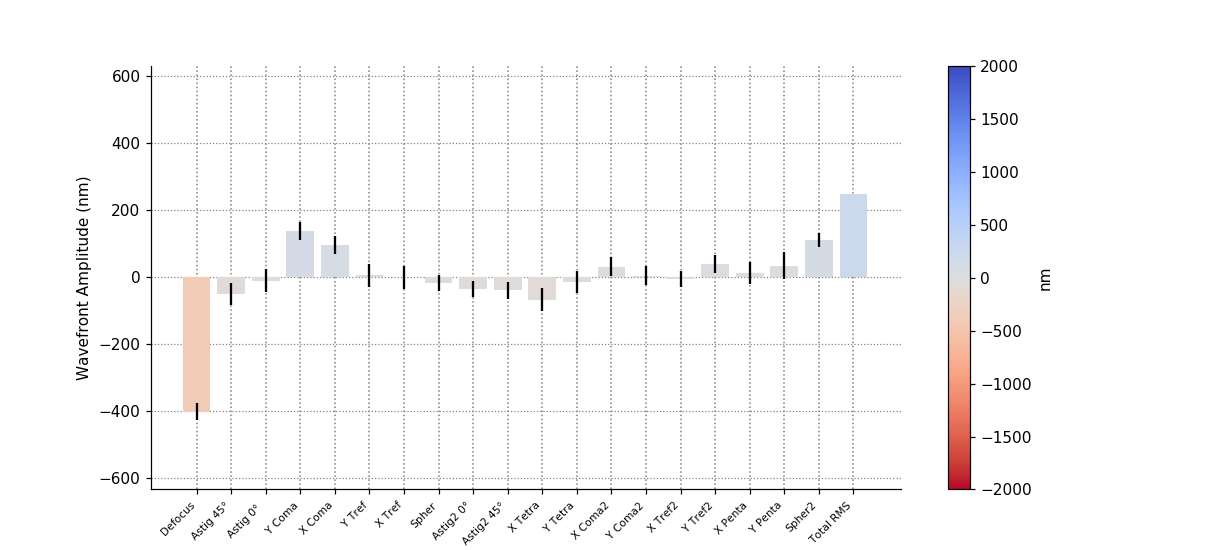

In [6]:
zvec.fringe_bar_chart().show()

In [ ]:
mask = mk_wfs_mask(slopes['data'][29:415,85:456])

In [ ]:
plt.imshow(mask, origin='lower')
plt.show()

In [9]:
zvec.fringe_bar_chart(max_c=500*u.nm).savefig("zernikes.pdf")